# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# url = "https://raw.githubusercontent.com/diegofurukawa/Python_Ebac/77fbfbb6fd3ec9b1cf26f8f619077ee52cfbed78/Profissao_Cientista_de_Dados/DataFrames/SINASC_RO_2019.csv"
# csv = requests.get(url).content
# sinasc = pd.read_csv(csv)
sinasc = pd.read_csv('SINASC_RO_2019.csv')
# sinasc = pd.read_csv(r'..\SINASC_RO_2019.csv')

print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:

# - 0 a 3: 'asfixia grave'
#- 4 a 5: 'asfixia moderada'
#- 6 a 7: 'asfixia leve'
#- 8 a 10: 'normal'

sinasc.loc[(sinasc['APGAR5'] > 0) & (sinasc['APGAR5'] <= 3),'APGAR5_CATG'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5),'APGAR5_CATG'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7),'APGAR5_CATG'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10),'APGAR5_CATG'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] > 10)] = 'Não Categorizada'


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [7]:
# Selecionando apenas as colunas do grafico, melhor visual e entendimento

sinasc_grafico = sinasc[['GESTACAO', 'APGAR5', 'APGAR5_CATG', 'SEXO']]

sinasc_grafico

,GESTACAO,APGAR5,APGAR5_CATG,SEXO
0,37 a 41 semanas,10.0,normal,Masculino
1,37 a 41 semanas,9.0,normal,Feminino
2,37 a 41 semanas,10.0,normal,Feminino
3,37 a 41 semanas,10.0,normal,Feminino
4,37 a 41 semanas,10.0,normal,Feminino
...,...,...,...,...
27023,32 a 36 semanas,9.0,normal,Masculino
27024,37 a 41 semanas,9.0,normal,Masculino
27025,37 a 41 semanas,10.0,normal,Masculino
27026,32 a 36 semanas,9.0,normal,Masculino


<Axes: ylabel='count'>

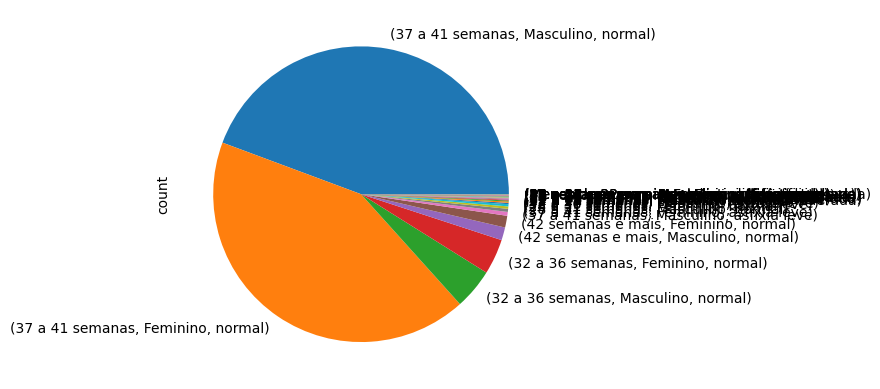

In [8]:
sinasc_grafico[['GESTACAO', 'SEXO', 'APGAR5_CATG']].value_counts().plot.pie()

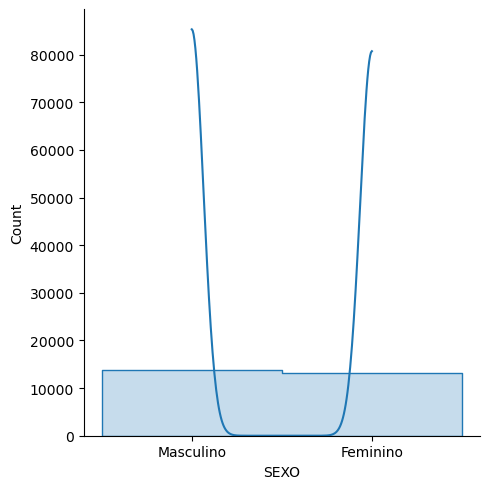

In [9]:
sns.displot(data = sinasc_grafico[['GESTACAO', 'SEXO', 'APGAR5']] 
            ,alpha = .25
            ,x = 'SEXO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:


sinasc_grafico_crosstable = pd.crosstab(index = sinasc_grafico['GESTACAO']
                                        ,rownames=['GESTACAO']
                                        ,margins = True
                                        ,columns = sinasc_grafico['APGAR5'])

# convert the tuple of tuples to a Pandas DataFrame
# sinasc_grafico_crosstable = pd.DataFrame(sinasc_grafico_crosstable, columns=['GESTACAO','0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'])

sinasc_grafico_crosstable

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8,85
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13,162
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465,2234
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284,22523
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223,698
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1,7
All,16,22,16,14,21,40,72,234,1908,15372,7994,25709


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [13]:


sinasc_grafico_barras = (sinasc_grafico_crosstable.cumsum() / sinasc_grafico_crosstable.sum()) * 100

sinasc_grafico_barras

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,21.875,0.000000,25.000,21.428571,2.380952,0.00,1.388889,2.136752,0.628931,0.061801,0.050038,0.165312
28 a 31 semanas,21.875,0.000000,31.250,25.000000,14.285714,8.75,6.250000,4.487179,2.227463,0.240697,0.131349,0.480377
32 a 36 semanas,28.125,4.545455,37.500,32.142857,33.333333,22.50,18.055556,16.452991,11.713836,4.491933,3.039780,4.825159
37 a 41 semanas,43.750,50.000000,46.875,50.000000,50.000000,48.75,49.305556,48.717949,48.846960,48.614364,48.598949,48.628885
42 semanas e mais,46.875,50.000000,46.875,50.000000,50.000000,50.00,50.000000,49.786325,50.000000,49.990242,49.993745,49.986386
Menos de 22 semanas,50.000,50.000000,50.000,50.000000,50.000000,50.00,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
All,100.000,100.000000,100.000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

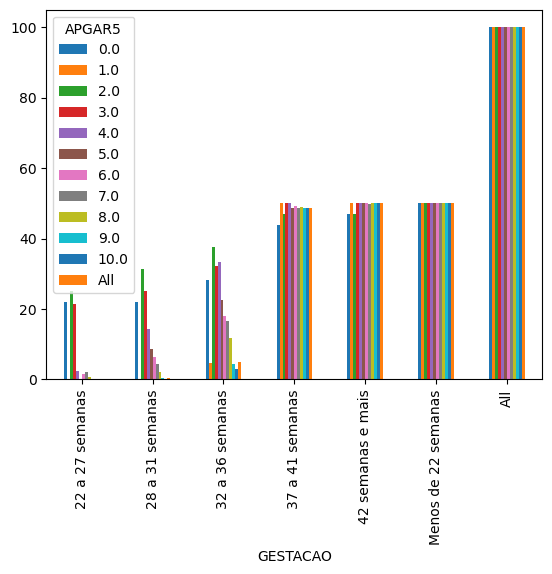

In [15]:

sinasc_grafico_barras.plot.bar()



/tmp/ipykernel_236220/878605063.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


[Text(0, 0, '22 a 27 semanas'),
 Text(1, 0, '28 a 31 semanas'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '37 a 41 semanas'),
 Text(4, 0, '42 semanas e mais'),
 Text(5, 0, 'Menos de 22 semanas'),
 Text(6, 0, 'All')]

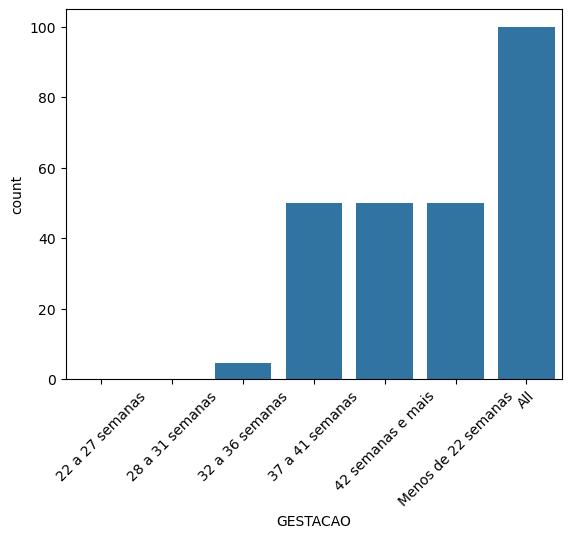

In [16]:


#create seaborn countplot
my_plot = sns.countplot(x='GESTACAO', data=sinasc_grafico_barras)

#rotate x-axis labels
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)



#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

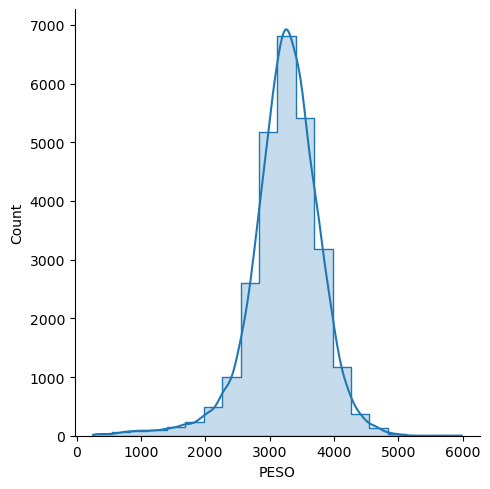

In [40]:
# sinasc[['PESO','APGAR5_CATG']]


sns.displot(data = sinasc[['PESO','APGAR5_CATG']] 
            ,alpha = .25
            ,x = 'PESO'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )
